# non-linear regressor
## chiziqli bo'lmagan regressiya

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

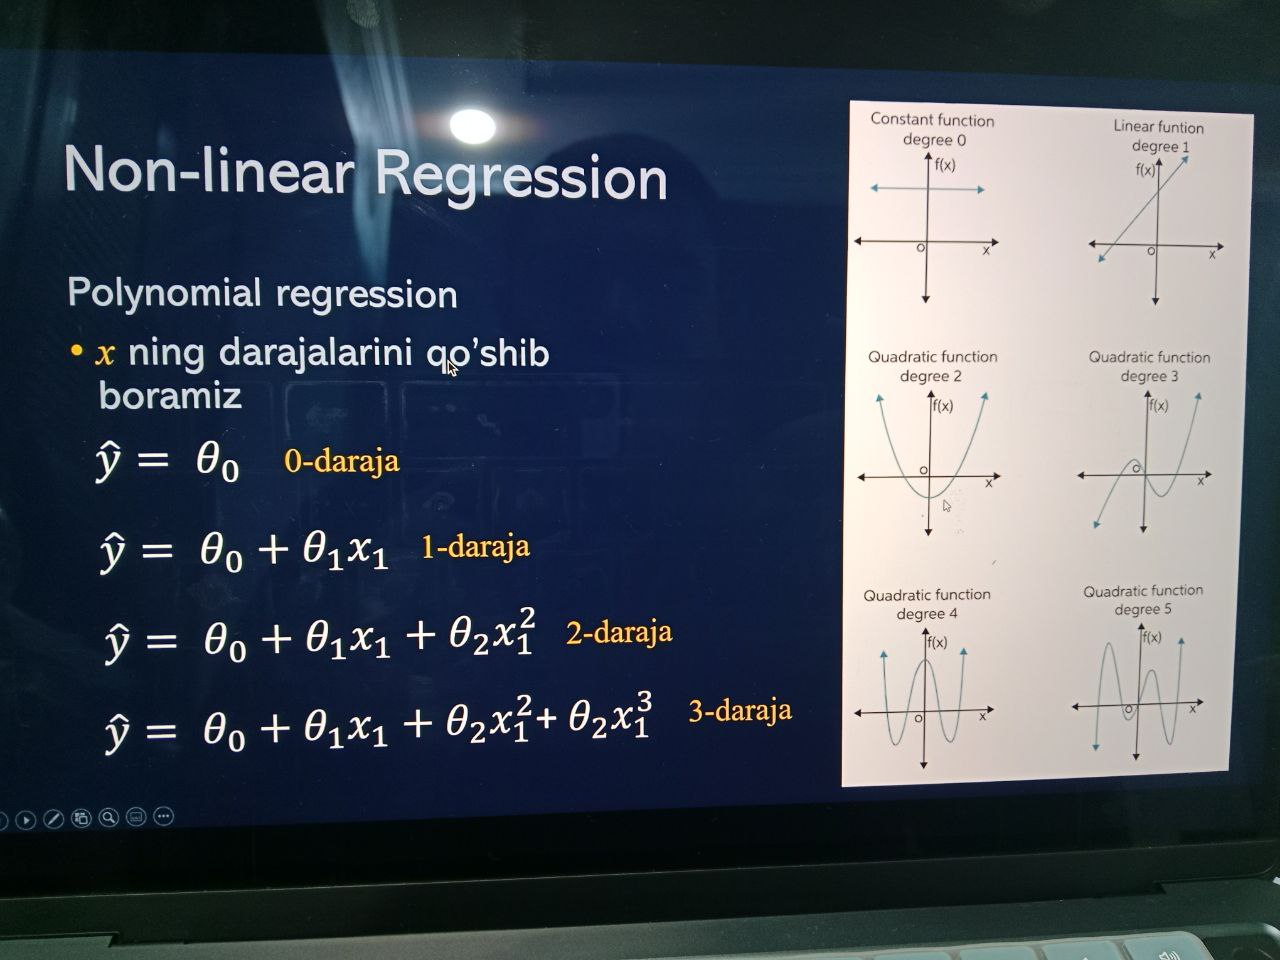

In [35]:
Image('polinomial_regressiya.jpg')

In [2]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
   
df = pd.read_csv(url)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


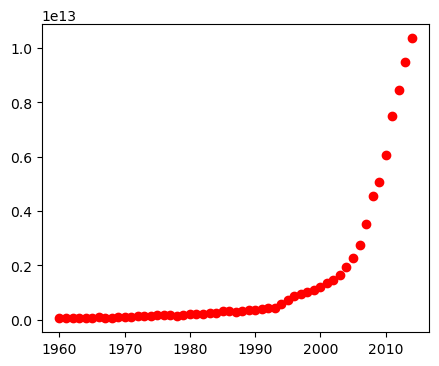

In [5]:
plt.figure(figsize=(5,4))
x_data, y_data = (df['Year'].values,df['Value'].values)
plt.plot(x_data, y_data, 'ro')
plt.show()

# malumotlarni ajratib olamiz va normalizatsiya qilamiz

In [6]:
X = np.asanyarray(df[['Year']]/df.Year.max())
y = np.asanyarray(df[['Value']]/df.Value.max())

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [8]:
yhat = model.predict(X)

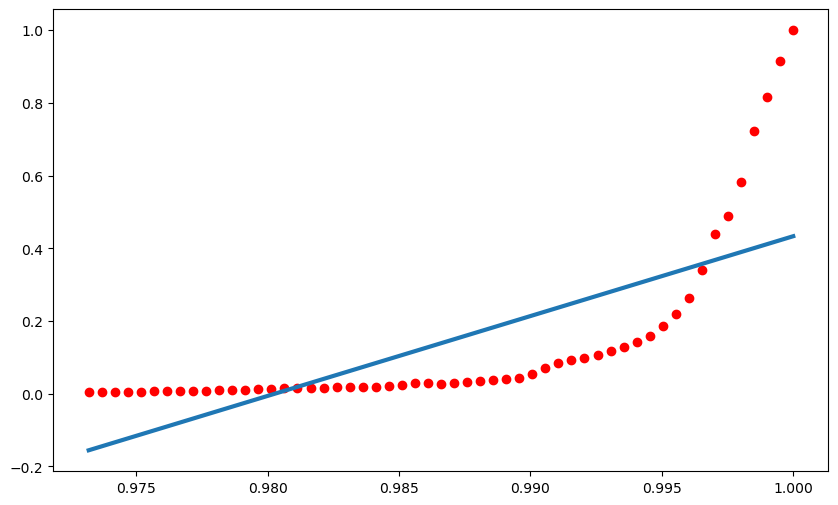

In [9]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'ro', label='data')
plt.plot(X,yhat, linewidth=3.0, label='fit')
plt.show()

In [10]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(yhat,y))

MAE: 0.12657979406214742


# Polynomial regression

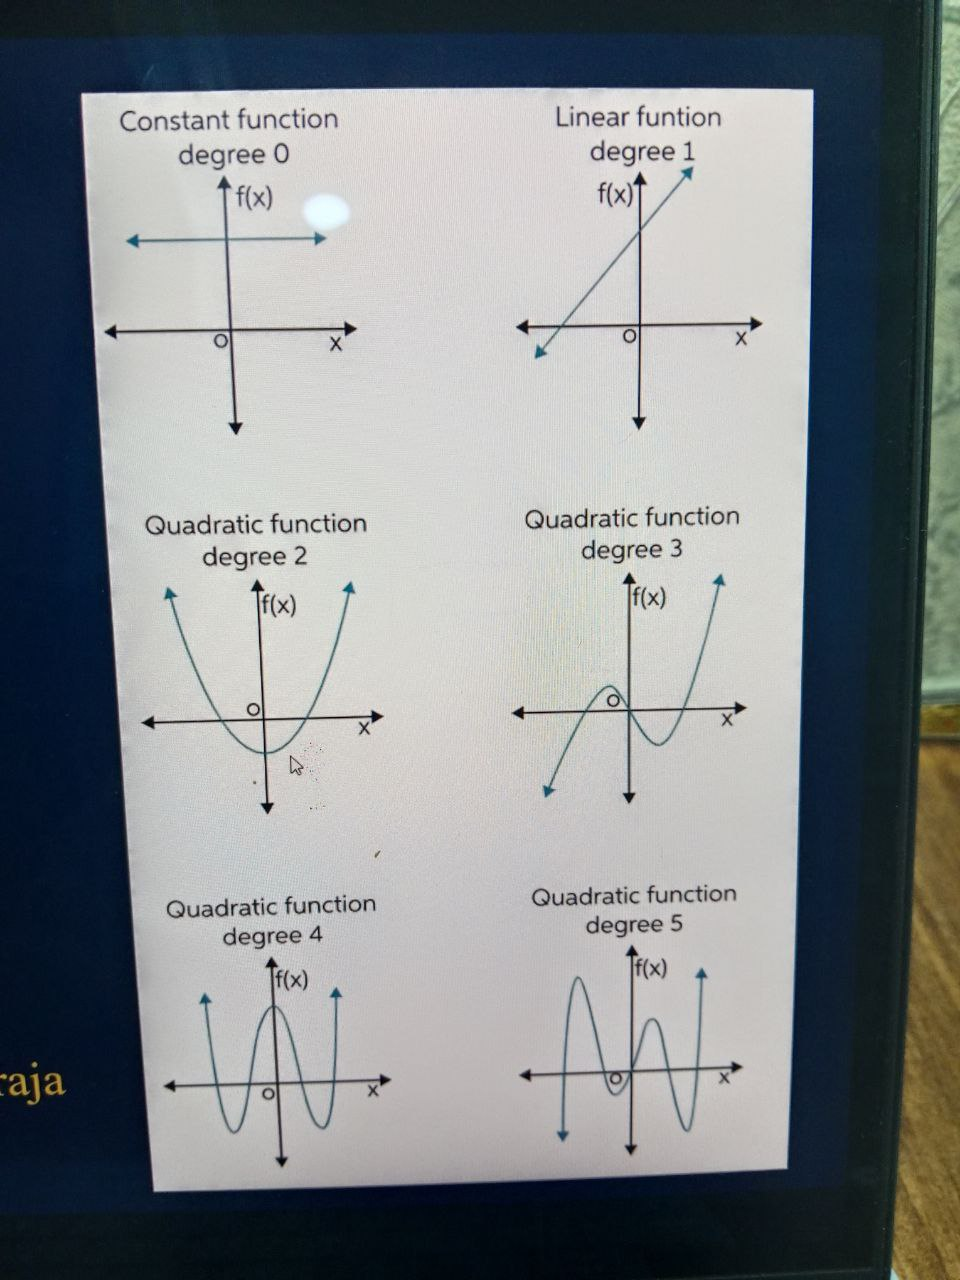

In [39]:
Image('degree.jpg', height=200)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_futures = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_futures.fit_transform(X)

## endi tepadagi liniar regressiyani choqirib modelni fit qilib olamiz

In [20]:
model.fit(X_poly,y)

LinearRegression()

In [21]:
ythatx = model.predict(X_poly)

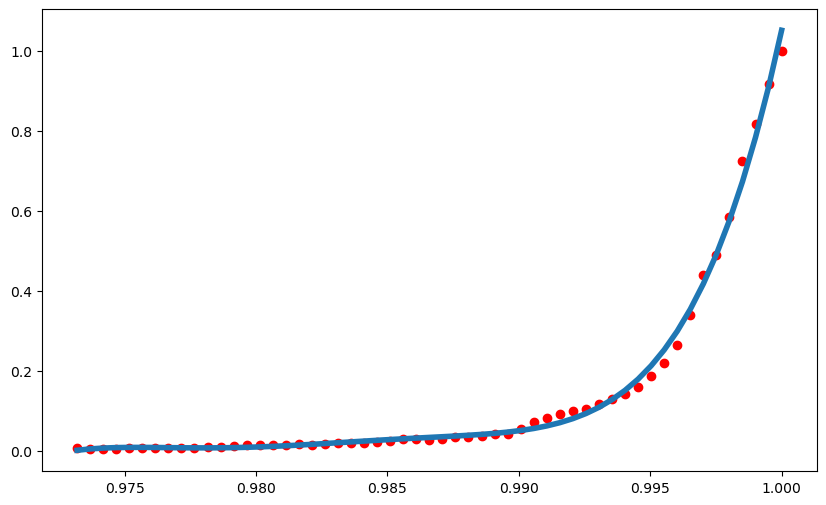

In [22]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'ro', label='data')
plt.plot(X,ythatx, linewidth=4.0, label='fit')
plt.show()

In [24]:
print("MAE:", mean_absolute_error(ythatx,y))

MAE: 0.009253887226984265


## `curve_fit`
'curve_fit' yordamida o'zimiz yozgan funksiyalar asosida model qurishimiz mumkin. 

Misol uchun, yuqoridagi ma'lumotlar Logistic regression funksiyasi yordamida aniqroq bashorat qilinishi mumkin.

# $$ \hat{Y} = \frac1{1+e^{-\beta_1(X-\beta_2)}}$$

Keling, logisti regression funksiyasini yozib olamiz:

## endi biz exponal methodini qulda yozib koramiz

In [25]:
x_data, y_data = (df["Year"].values, df["Value"].values)
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [29]:
def sigmoid(x, beta1, beta2):
    y = 1 / (1 + np.exp(-beta1*(x-beta2)))
    return y

In [30]:
from scipy.optimize import curve_fit

beta, pcov = curve_fit(sigmoid, xdata,ydata)
print(f"beta1={beta[0]}\nbeta2={beta[1]}")

beta1=690.4517142174786
beta2=0.9972071272537256


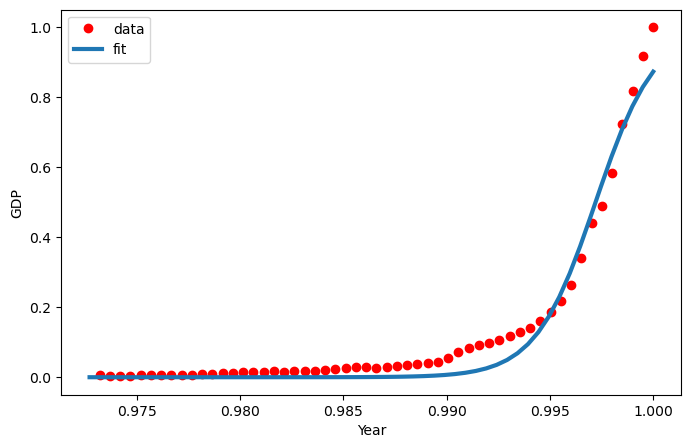

In [31]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
yhat = sigmoid(x, *beta)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,yhat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [32]:
print("MAE:", mean_absolute_error(yhat,ydata))

MAE: 0.030498418850095386


In [33]:
from IPython.display import Image

# biz manabu formulalardan foydalansak ham boladi

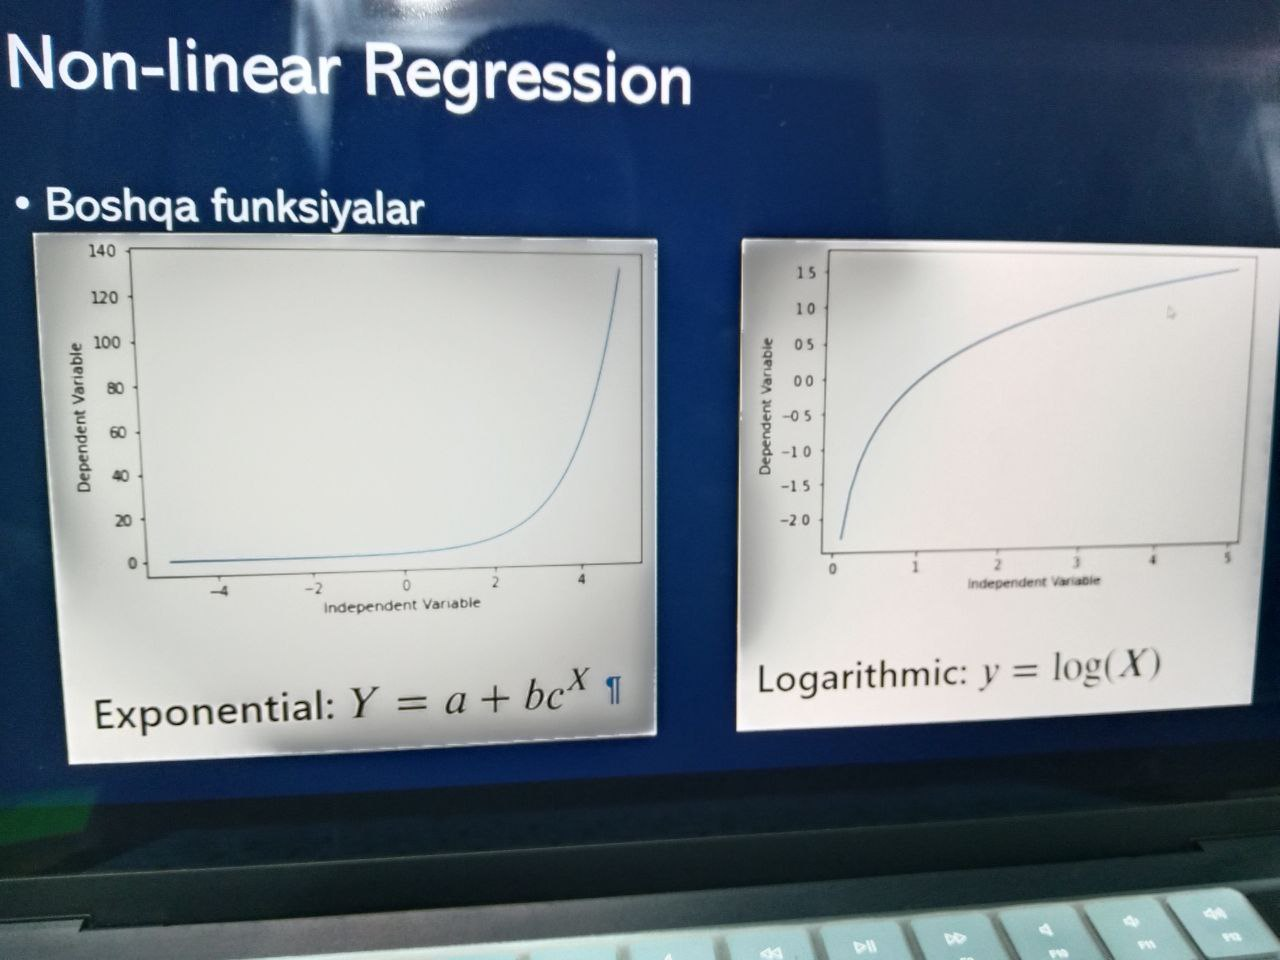

In [34]:
Image('exp_logorifmic.jpg')